# Sırtlan ve Kurt

Resimleri sırtlan veya kurt olarak sınıflandıran cnn tabanlı bir sınıflandırma modeli inşa edecegiz.


bu veri seti 150 sırtlan ve 150 kurt yaklaşık olarak 300 tane resim içermektedir. bu resimler algoritmanın en iyi çalışması için aynı boyutlarda olması gerekmektedir. ama sorun şu ki bu resimleri yeniden boyutlandırırken pek çok sorun ile karşılaşırız. mesela 600 x 420 pixel boyutlarındaki bir resimi 224X 224 boyutlarına getirdiginizde ciddi bir görüntü kaybı yaşanmaktadır. görüntü kayıplarını engellemk için resimler özen ile tek tek kırpılmış ve yeniden boyutlandırılmıştır. 

bu iki klasörün her biri eğitim, doğrulama ve test olarak üç parçaya ayrılacaktır. eğitim seti için 180, doğrulama seti için 60 ve test seti  60 tane örnek içerecektir.


Veri egitim seti dropbox adresi: https://www.dropbox.com/sh/c9ox9bfpoc9kqh5/AAB5ZWj1JpFTc3NXTQWrfNIpa?dl=0 


In [23]:
import os


Aşagıdaki hücre sadece 1 kere çalıştırılarak, gerekli olan dosya yollarını kullanacagımız değişkenlere atayacaktır. genel klasörümüzün altında train, test ve validation klasörleri var.  bu klasörlerin her birinde yine kurt ve sirtlan klasörleri var.

In [28]:
base_dir = '../input/hayvanlar'

train_dir = os.path.join(base_dir, "train")

validation_dir = os.path.join(base_dir, "validation")

test_dir = os.path.join(base_dir, "test")

train_hyena_dir = os.path.join(base_dir, 'train/sirtlan')

validation_hyena_dir = os.path.join(base_dir, 'validation/sirtlan')

test_hyena_dir = os.path.join(base_dir, 'test/sirtlan')

train_wolf_dir = os.path.join(base_dir, 'train/kurt')

validation_wolf_dir = os.path.join(base_dir, 'validation/kurt')

test_wolf_dir = os.path.join(base_dir, 'test/kurt')

Uygulamamız Boyunca Birçok kez kullanacagımız Doğruluk ve kayıp fonksiyonlarını çalıştıracak bir fonksiyon tanımlıyoruz.

In [29]:
import matplotlib.pyplot as plt

def plot_accuracy_and_loss(history):
    acc = history.history['acc']
    val_acc = history.history['val_acc']
    loss = history.history['loss']
    val_loss = history.history['val_loss']

    epochs = range(1, len(acc) + 1)

    plt.plot(epochs, acc, 'bo', label='Training acc')
    plt.plot(epochs, val_acc, 'b', label='Validation acc')
    plt.title('Training ve validation accuracy')
    plt.legend()
    plt.show()

    plt.plot(epochs, loss, 'bo', label='Training loss')
    plt.plot(epochs, val_loss, 'b', label='Validation loss')
    plt.title('Training ve validation loss')
    plt.legend()
    plt.show()

> ## 1. Adım Modelimizi direkt olarak inşaa ediyoruz

In [30]:
from keras import layers, models, optimizers

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)))
model.add(layers.MaxPool2D(2, 2))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPool2D(2, 2))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPool2D(2, 2))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPool2D(2, 2))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])

##### Aşagıda verilen kodlar ile ilk önce bütün resimlerimizi 224 x 224 pixel boyutlarına geliyoruz. her bir batchin içinde 25 tane resim olacak. veri sayımıız çok oldugu için batch sayısının çok büyük olmasını istemedim ama çok küçük olursada işlem çok uzuyor. ve resimlerimiz rgb olarak işlenecek

In [31]:
from keras.preprocessing.image import ImageDataGenerator

# verileri küçük bir değer aralıgına sıkıştırmak her zaman işimize yarar. 0-255 arasından ziyada 0-1 istiyoruz
train_datagen = ImageDataGenerator(rescale=1./255) 
test_datagen = ImageDataGenerator(rescale=1./255)

# eğitim verilerini topla ve istedigimiz şekle getir.
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=20, # batch ikinin katları olmalı.
    class_mode='binary') # ikili sınıflandırma kullandıgımız için binary olacak
 
validation_generator = test_datagen.flow_from_directory(
    validation_dir,
    target_size=(224, 224),
    batch_size=20,
    class_mode='binary')

Found 180 images belonging to 2 classes.
Found 60 images belonging to 2 classes.


In [32]:
for data_batch, labels_batch in train_generator:
    print ('data batch shape:', data_batch.shape)
    print ('labels batch shape:', labels_batch.shape)
    break

data batch shape: (20, 224, 224, 3)
labels batch shape: (20,)


In [33]:
history = model.fit_generator(
    train_generator,
    steps_per_epoch=9, # 9 x 20 = 180
    epochs=20, # ilk olarak epoch 20 olarak çalıştıracagız
    validation_data=validation_generator,
    validation_steps=3) # 20 x 3= 60

Epoch 1/20
9/9 [==============================] - 13s 1s/step - loss: 0.7834 - acc: 0.5556 - val_loss: 0.6752 - val_acc: 0.5000
Epoch 2/20
9/9 [==============================] - 13s 1s/step - loss: 0.6887 - acc: 0.4944 - val_loss: 0.6311 - val_acc: 0.8000
Epoch 3/20
9/9 [==============================] - 12s 1s/step - loss: 0.6874 - acc: 0.6278 - val_loss: 0.6555 - val_acc: 0.5333
Epoch 4/20
9/9 [==============================] - 12s 1s/step - loss: 0.6300 - acc: 0.6111 - val_loss: 0.5048 - val_acc: 0.7500
Epoch 5/20
9/9 [==============================] - 12s 1s/step - loss: 0.6609 - acc: 0.6167 - val_loss: 0.5080 - val_acc: 0.7667
Epoch 6/20
9/9 [==============================] - 12s 1s/step - loss: 0.6038 - acc: 0.6944 - val_loss: 0.5863 - val_acc: 0.8000
Epoch 7/20
9/9 [==============================] - 13s 1s/step - loss: 0.5691 - acc: 0.7556 - val_loss: 0.5879 - val_acc: 0.8167
Epoch 8/20
9/9 [==============================] - 12s 1s/step - loss: 0.5221 - acc: 0.7722 - val_loss: 0

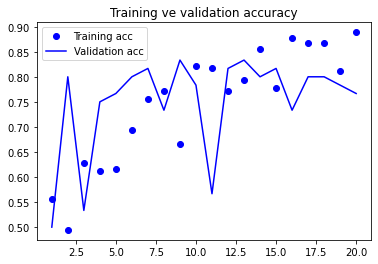

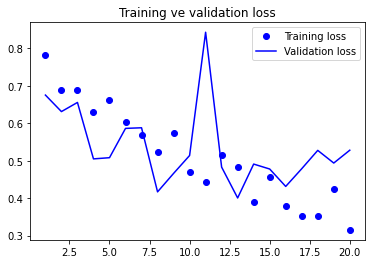

In [34]:
plot_accuracy_and_loss(history)

modelimiz overfitting olmuş. training accurancy zaman içinde artarken bu durum validation accurancyde görülmemiş. validation accurancy genel olarak sabit bir düzeyde kalmış training accurancy, validation accuranyden daha yüksek ve validation loss , training lossdan daha yüksek bunlar overfitting göstergeleridir.

In [36]:
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(224, 224),
    batch_size=20,
    class_mode='binary')

test_loss, test_acc = model.evaluate_generator(test_generator, steps=3)
print('test acc:', test_acc)

Found 60 images belonging to 2 classes.
test acc: 0.6166666746139526


accurancy oranımız 0.88 iken testimiz 0.61 çıktı arada bu kadar fark olması yine overfitting işaretlerinden biri

## 2. Adım Data augmentation

 data augmentation yöntemi ile modelimizin gerçek dünya verileri ile ne kadar başarılı olacagını test edicegiz. bunun içinde sadece egitim verilerini çeşitli yöntemler ile çogaltacagız.

In [65]:
from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')

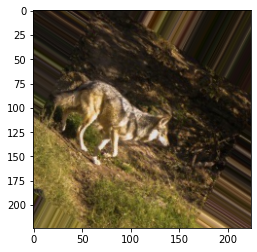

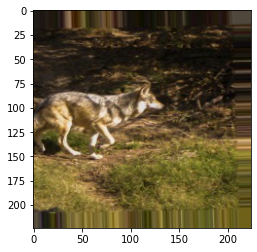

In [66]:
from keras.preprocessing import image

fnames = [os.path.join(train_wolf_dir, fname) for fname in os.listdir(train_wolf_dir)]

img_path = fnames[9] # rastgele bir resim seç

img = image.load_img(img_path, target_size=(224, 224)) # resimleri 224 * 224 boyutunda olacak şeklinde img degişkenine at

x = image.img_to_array(img) # numpy dizisine dönüştür (224, 224, 3)

x = x.reshape((1,) + x.shape)

# var olan resimlerimizi kullanarak, dönderilmiş resim üretiyor. her bir resimden 2 yeni resim oluşturuyor.
i = 0
for batch in datagen.flow(x, batch_size=1):
    plt.figure(i)
    imgplot = plt.imshow(image.array_to_img(batch[0]))
    i += 1
    if i % 2 == 0: # sadece 2 tane üretsin fazla olursa model underfitting yapmaya başlıyor
        break
plt.show()

In [100]:
from keras import layers, models, optimizers
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)))
model.add(layers.MaxPool2D(2, 2))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPool2D(2, 2))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPool2D(2, 2))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPool2D(2, 2))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])

In [101]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255) # augamentation sadece train üzerinde yapılır.

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
    validation_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary')

Found 180 images belonging to 2 classes.
Found 60 images belonging to 2 classes.


In [105]:
history = model.fit_generator(
    train_generator,
    steps_per_epoch=10, 
    epochs=22,
    validation_data=validation_generator,
    validation_steps=3)

Epoch 1/22
10/10 [==============================] - 22s 2s/step - loss: 0.4930 - acc: 0.7804 - val_loss: 0.4620 - val_acc: 0.8043
Epoch 2/22
10/10 [==============================] - 23s 2s/step - loss: 0.5117 - acc: 0.7597 - val_loss: 0.6141 - val_acc: 0.7955
Epoch 3/22
10/10 [==============================] - 21s 2s/step - loss: 0.5548 - acc: 0.7297 - val_loss: 0.3697 - val_acc: 0.8043
Epoch 4/22
10/10 [==============================] - 21s 2s/step - loss: 0.4788 - acc: 0.7565 - val_loss: 0.3890 - val_acc: 0.8295
Epoch 5/22
10/10 [==============================] - 22s 2s/step - loss: 0.5067 - acc: 0.7432 - val_loss: 0.6485 - val_acc: 0.7174
Epoch 6/22
10/10 [==============================] - 21s 2s/step - loss: 0.5110 - acc: 0.7601 - val_loss: 0.4456 - val_acc: 0.8182
Epoch 7/22
10/10 [==============================] - 22s 2s/step - loss: 0.4532 - acc: 0.7825 - val_loss: 0.4671 - val_acc: 0.7717
Epoch 8/22
10/10 [==============================] - 21s 2s/step - loss: 0.5550 - acc: 0.73

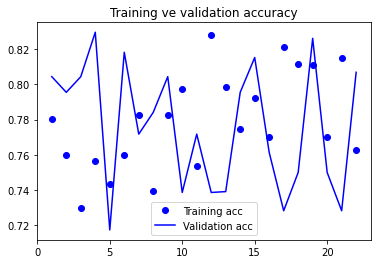

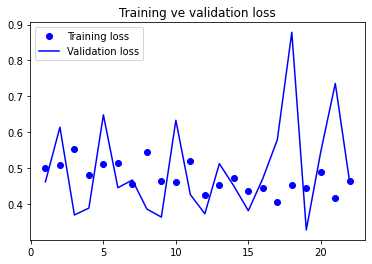

In [106]:
plot_accuracy_and_loss(history)



veri sayımızın artmasıyla validation accurancy ve loss arasındaki fark, geçen sefere göre dahada arttı ve validation ve training grafikleri birbirine daha fazla yaklaştı yani overfitting azaldı. ama modelimizde hala overfitting var. dropout ekleyerek overfitting azaltabiliriz.

In [107]:
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(224, 224),
    batch_size=20,
    class_mode='binary')

test_loss, test_acc = model.evaluate_generator(test_generator, steps=3)
print('test acc:', test_acc)

Found 60 images belonging to 2 classes.
test acc: 0.75


test dogrulugumuz 0.61 den 0.75 çıktı ve training accurancy  ile arasındaki yakınlık bize overfittingin azaldıgını gösteriyor

## 3. Adım Dropout Eklemek

In [109]:
from keras import layers, models, optimizers

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)))
model.add(layers.MaxPool2D(2, 2))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPool2D(2, 2))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPool2D(2, 2))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPool2D(2, 2))
model.add(layers.Flatten())
model.add(layers.Dropout(0.8)) # tam olarak dropout ekledigimiz kısım
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])

In [110]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary') 

validation_generator = test_datagen.flow_from_directory(
    validation_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary')

Found 180 images belonging to 2 classes.
Found 60 images belonging to 2 classes.


In [111]:
history = model.fit_generator(
    train_generator,
    steps_per_epoch=10, # 
    epochs=27,
    validation_data=validation_generator,
    validation_steps=3) # 

Epoch 1/27
10/10 [==============================] - 23s 2s/step - loss: 0.7000 - acc: 0.4696 - val_loss: 0.6959 - val_acc: 0.5000
Epoch 2/27
10/10 [==============================] - 21s 2s/step - loss: 0.6827 - acc: 0.5405 - val_loss: 0.6597 - val_acc: 0.6591
Epoch 3/27
10/10 [==============================] - 40s 4s/step - loss: 0.6793 - acc: 0.5390 - val_loss: 0.6235 - val_acc: 0.5326
Epoch 4/27
10/10 [==============================] - 21s 2s/step - loss: 0.6580 - acc: 0.5912 - val_loss: 0.5700 - val_acc: 0.7273
Epoch 5/27
10/10 [==============================] - 21s 2s/step - loss: 0.6393 - acc: 0.6419 - val_loss: 0.5803 - val_acc: 0.6848
Epoch 6/27
10/10 [==============================] - 22s 2s/step - loss: 0.6456 - acc: 0.6201 - val_loss: 0.5739 - val_acc: 0.7955
Epoch 7/27
10/10 [==============================] - 21s 2s/step - loss: 0.6016 - acc: 0.6588 - val_loss: 0.5621 - val_acc: 0.7174
Epoch 8/27
10/10 [==============================] - 22s 2s/step - loss: 0.6152 - acc: 0.66

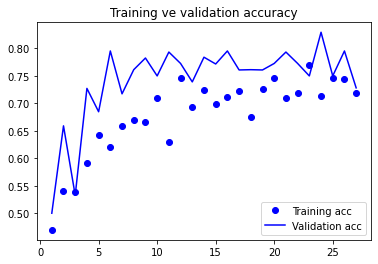

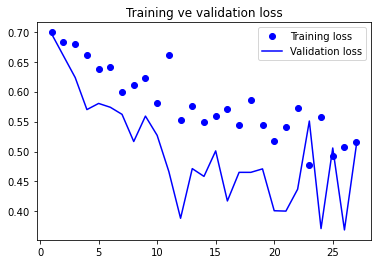

In [112]:
plot_accuracy_and_loss(history)

modelimiz ovefittingten kurtuldu ama bu sefer underfitting yapmaya başladı. yani veri setimizi fazla anlayamıyor. epoch sayısının yükselmesi lazım

In [114]:
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary')

test_loss, test_acc = model.evaluate_generator(test_generator, steps=3)
print('test acc:', test_acc)

Found 60 images belonging to 2 classes.
test acc: 0.5869565010070801


In [ ]:
modelimiz underfitting oldugu için test accurancy, gözle görülür  bir şekilde düştü

## 4. Adım Epoch Ayarlarını Tamamlama

In [115]:
from keras import layers, models, optimizers

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)))
model.add(layers.MaxPool2D(2, 2))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPool2D(2, 2))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPool2D(2, 2))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPool2D(2, 2))
model.add(layers.Flatten())
model.add(layers.Dropout(0.8)) # dropout 0.8 olarak belirliyoruz
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])

In [116]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary') 

validation_generator = test_datagen.flow_from_directory(
    validation_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary')

Found 180 images belonging to 2 classes.
Found 60 images belonging to 2 classes.


In [117]:
history = model.fit_generator(
    train_generator,
    steps_per_epoch=10, # 
    epochs=30,
    validation_data=validation_generator,
    validation_steps=3) # 

Epoch 1/30
10/10 [==============================] - 22s 2s/step - loss: 0.7055 - acc: 0.5270 - val_loss: 0.6653 - val_acc: 0.6522
Epoch 2/30
10/10 [==============================] - 22s 2s/step - loss: 0.6749 - acc: 0.6104 - val_loss: 0.5994 - val_acc: 0.5000
Epoch 3/30
10/10 [==============================] - 21s 2s/step - loss: 0.6470 - acc: 0.6318 - val_loss: 0.5506 - val_acc: 0.7174
Epoch 4/30
10/10 [==============================] - 21s 2s/step - loss: 0.6364 - acc: 0.6250 - val_loss: 0.5318 - val_acc: 0.7159
Epoch 5/30
10/10 [==============================] - 21s 2s/step - loss: 0.6086 - acc: 0.6622 - val_loss: 0.5251 - val_acc: 0.7717
Epoch 6/30
10/10 [==============================] - 22s 2s/step - loss: 0.6255 - acc: 0.6494 - val_loss: 0.5630 - val_acc: 0.8295
Epoch 7/30
10/10 [==============================] - 22s 2s/step - loss: 0.6292 - acc: 0.6429 - val_loss: 0.5434 - val_acc: 0.7717
Epoch 8/30
10/10 [==============================] - 21s 2s/step - loss: 0.5982 - acc: 0.67

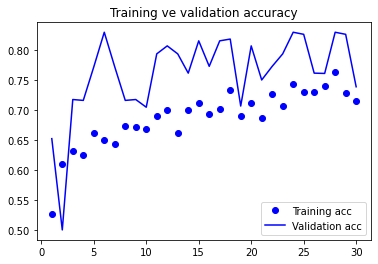

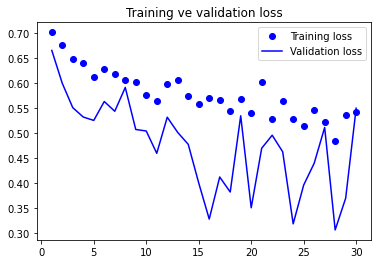

In [118]:
plot_accuracy_and_loss(history)

epoch sayısı arttıgı için, modelimiz artık verilerimizi daha iyi anlayabiliyor. genel olarak daha birbirleriyle daha uyumlu loss ve accurancy grafikleri elde ettik

In [119]:
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary')

test_loss, test_acc = model.evaluate_generator(test_generator, steps=3)
print('test acc:', test_acc)

Found 60 images belonging to 2 classes.
test acc: 0.6521739363670349


test dogrulugumuz 0.58'den 0.65 cıktı ve training accurancy ile arasındaki yakınlık bize şimdiye kadarki en dogru modeli inşaa ettigimizi gösteriyor